## Monte Carlo - Euler Discretization - Part I

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Download the data for Microsoft (‘MSFT’) from Yahoo Finance for the period ‘2000-1-1’ until today.

In [30]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [31]:
ticker = 'MSFT'  
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']

Store the annual standard deviation of the log returns in a variable, called “stdev”.

In [32]:
log_returns=np.log((1+data.pct_change()))
stdev=log_returns.std()*250**0.5
stdev

MSFT    0.27886
dtype: float64

Set the risk free rate, r, equal to 2.5% (0.025).

In [33]:
r=0.025

To transform the object into an array, reassign stdev.values to stdev.

In [34]:
stdev=stdev.values

Set the time horizon, T, equal to 1 year, the number of time intervals equal to 250, the iterations equal to 10,000. Create a variable, delta_t, equal to the quotient of T divided by the number of time intervals.

In [45]:
T=1
t_intervals=250
iterations=10000
delta_t=T/t_intervals

Let Z equal a random matrix with dimension (time intervals + 1) by the number of iterations. 

In [46]:
Z=np.random.standard_normal((time_i+1,iterations ))

Use the .zeros_like() method to create another variable, S, with the same dimension as Z. S is the matrix to be filled with future stock price data. 

In [47]:
S=np.zeros_like(Z)


Create a variable S0 equal to the last adjusted closing price of Microsoft. Use the “iloc” method.

In [48]:
SO=data.iloc[-1]
S[0]=SO

Use the following formula to create a loop within the range (1, t_intervals + 1) that reassigns values to S in time t.

$$
S_t = S_{t-1} \cdot exp((r - 0.5 \cdot stdev^2) \cdot delta_t + stdev \cdot delta_t^{0.5} \cdot Z_t)
$$

In [70]:
#for i in range(1,time_i+1):
 #   S[i]=S[i-1]+np.exp((r-0.5*np.power(stdev,2)*delta_t)+(stdev*np.sqrt(delta_t)*Z[i]    ))



In [73]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 *np.power(stdev,2)) * delta_t +( stdev * np.sqrt(delta_t) * Z[t]))

Plot the first 10 of the 10,000 generated iterations on a graph.

In [78]:
S[:10].shape

(10, 10000)

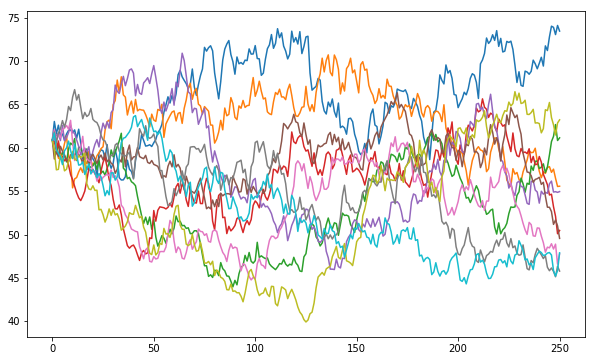

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(S[0:,:10]);